Se for executar o código, deve ser proceduralmente, pois pode ser que os valores de $x$ e $y$ de uma questão possa estar em outra.

#**2. Regressão Polinomial**

In [12]:
import numpy as np
import matplotlib.pyplot as plt


def regressaoPolinomial(x,y,n):
  m_ones = np.ones((len(x), 1))

  X = np.zeros((len(x), n))

  X = np.concatenate((m_ones, X), 1)
  #print(X)

  dim = np.shape(X)

  aux_v = 0
  aux = n-1
  for l in range(0, dim[0]):
    for c in range(1, dim[1]):
      X[l][c] = (x[aux_v])**(n-aux)
      aux -= 1

    aux_v += 1
    aux = n-1

  print(X,"\n")

  Xt = np.copy(X)
  Xt = np.transpose(Xt)
  print(Xt,"\n")
  
  XtX = Xt @ X
  print(XtX,"\n")

  Xty = Xt @ y
  print(Xty,"\n")

  sols = np.linalg.inv(XtX) @ Xty

  v_er = X @ sols - y

  EQ = np.sum(np.abs(v_er**2))

  print(f'Soluções:\n{sols}\n')
  print(f'Vetor erro:\n{v_er}\n')
  print(f'Erro quadrático:\n{EQ}\n')

  return sols, v_er, EQ

def fn1(a0, a1, x):
  return a0 + a1*x

def fn2(a0, a1, a2, x):
  return a0 + a1*x + a2*x**2

**Para Regressão linear**

In [13]:
x = np.array([
              [1.2],
              [1.8],
              [2.1],
              [3.7],
              [4.5]
])

y = np.array([
              [5.71],
              [5.85],
              [6.85],
              [8.02],
              [9.87]
])



#sols, e, EQ = regressaoPolinomial(x, y, 1)

[[1.  1.2]
 [1.  1.8]
 [1.  2.1]
 [1.  3.7]
 [1.  4.5]] 

[[1.  1.  1.  1.  1. ]
 [1.2 1.8 2.1 3.7 4.5]] 

[[ 5.   13.3 ]
 [13.3  43.03]] 

[[ 36.3  ]
 [105.856]] 

Soluções:
[[4.02781495]
 [1.21510716]]

Vetor erro:
[[-0.22405646]
 [ 0.36500784]
 [-0.27046001]
 [ 0.50371145]
 [-0.37420282]]

Erro quadrático:
0.6503336121275493



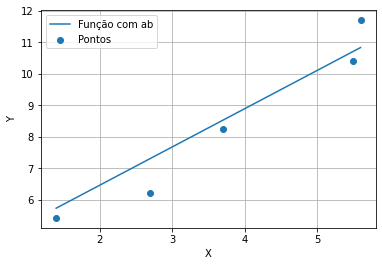

In [ ]:
a0 = sols[0]
a1 = sols[1]

plt.scatter(x,y, label='Pontos')
plt.plot(x, fn1(a0, a1, x), label="Função com ab")

plt.grid()
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

plt.show()

**Para a regressão polinomial do segundo grau**

In [4]:
x = np.array([
              [2.6],
              [3.7],
              [4.2],
              [5.8],
              [6.8]
])

y = np.array([
              [-6.72],
              [-18],
              [-27.6],
              [-53.5],
              [-84.3]
])

sols_2, e_2, EQ_2 = regressaoPolinomial(x, y, 2)

[[ 1.    2.6   6.76]
 [ 1.    3.7  13.69]
 [ 1.    4.2  17.64]
 [ 1.    5.8  33.64]
 [ 1.    6.8  46.24]] 

[[ -190.12  ]
 [-1083.532 ]
 [-6476.4832]] 

Soluções:
[[-7.33597775]
 [ 6.84562182]
 [-2.64112889]]

Vetor erro:
[[-0.67139233]
 [-0.16423154]
 [ 2.42612025]
 [-2.97894709]
 [ 1.38845071]]

Erro quadrático:
17.165720257876803



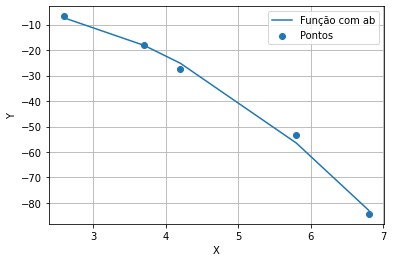

In [ ]:
a0 = sols_2[0]
a1 = sols_2[1]
a2 = sols_2[2]

plt.scatter(x,y, label='Pontos')
plt.plot(x, fn2(a0, a1, a2, x), label="Função com ab")

plt.grid()
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

plt.show()

#**3. Linearização**

In [ ]:
x = np.array([
     [1.4],
     [2.7],
     [3.7],
     [5.5],
     [5.6],         
])

y = np.array([
      [5.42],
      [6.22],
      [8.25],
      [10.4],
      [11.7],       
])

**Linearização da equação**

$f(x) = ab^x$

$y = ab^x$

$ln(y) = ln(ab^x)$

$ln(y) = ln(a) + ln(b^x)$

$ln(y) = ln(a) + xln(b)$


Substituindo os termos:

$H(x) = ln(y)$

$a_0 = ln(a)$

$a_1 = ln(b)$

Sendo assim, a equação linearizada será:

$H(x) = a_0 + a_1x$

In [ ]:
Ht = np.array(np.log(y))

print(f'H(x):\n{Ht}\n')

H(x):
[[1.69009582]
 [1.82776991]
 [2.1102132 ]
 [2.34180581]
 [2.45958884]]



In [ ]:
sols_3, e_3, EQ_3 = regressaoPolinomial(x, Ht, 1)

Soluções:
[[1.41135415]
 [0.17844988]]

Vetor erro:
[[-0.02891183]
 [ 0.06539893]
 [-0.03859448]
 [ 0.05102271]
 [-0.04891534]]

Erro quadrático:
0.011598474829902432



Com os valores de $a_0$ e $a_1$, a equação linearizada fica:

$a_0 = 1,411$

$a_1 = 0,178$

$H(x) = 1,411 + 0,178x$

Para achar os valores de $a$ e $b$ devemos substituir os termos $a_0$ e $a_1$
nas equações: 

1. a

$a_0=ln(a)$

$a = e^{a_0}$

2. b

$a_1=ln(b)$

$b = e^{a_1}$

In [ ]:
a = np.exp(sols_3[0])
b = np.exp(sols_3[1])

print(f'a = {a}\n')
print(f'b = {b}')

a = [4.10150571]

b = [1.19536298]


Assim a equação da função fica:

$f(x) = 4,101*1,195^x$

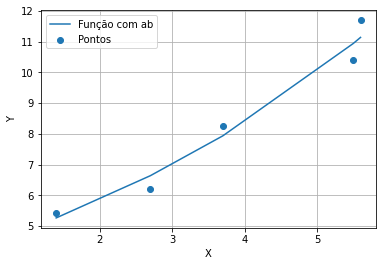

In [ ]:
def f(a,b,x):
  return a*b**x

plt.scatter(x,y, label='Pontos')
plt.plot(x, f(a,b,x), label="Função com ab")

plt.grid()
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

plt.show()